#### Types of categorical variables

Level and orders:
- Nominal: no order associates
- Ordinal: hierarchy among the categories

Nature of repetition:
- Binary
- Cyclic: ex: days of week

------
dataset: https://www.kaggle.com/c/cat-in-the-dat-ii 

In [3]:
import os
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Loading data set
# unzipping dataset
import zipfile
with zipfile.ZipFile("datasets/cat-in-the-dat-ii.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/cat-in-the-dat-ii/")

In [5]:
data_path = "datasets/cat-in-the-dat-ii/"
train = pd.read_csv(''.join([data_path,"train.csv"]))
test = pd.read_csv(''.join([data_path,"test.csv"]))

In [6]:
train.head(5)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [7]:
train.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

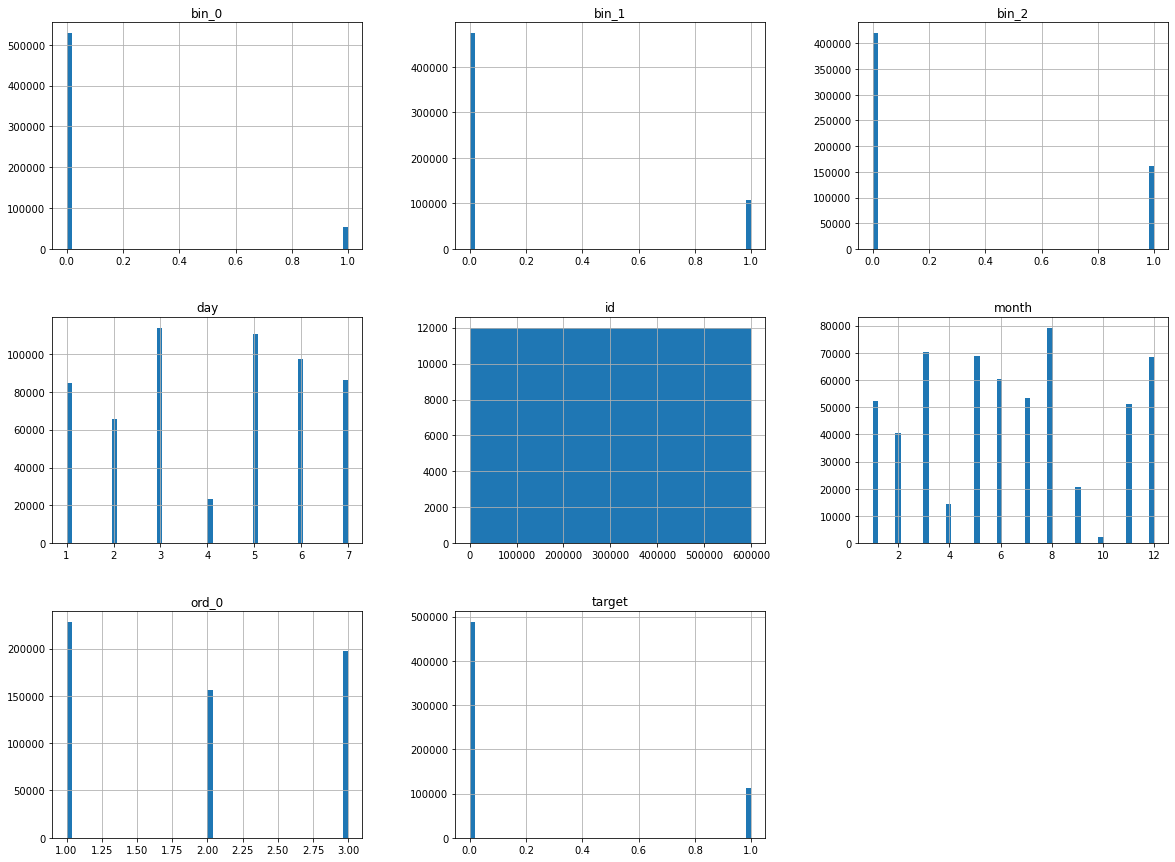

In [9]:
%matplotlib inline
train.hist(bins=50, figsize = (20,15))
plt.show()

In [10]:
import pandas as pd  
from sklearn import preprocessing  

#read the data  
train.loc[:, "ord_2"] = train.ord_2.fillna("NONE")  
lbl_enc = preprocessing.LabelEncoder()  
train.loc[:, "ord_2"] = lbl_enc.fit_transform(train.ord_2.values)

This is just converting the categories to numbers and then converting them to their  binary representation. We are thus splitting one feature into three (in this case)  features (or columns). If we have more categories, we might end up splitting into a  lot more columns. 

**One hot encoding**


It becomes easy to store lots of binarized variables like this if we store them in a  sparse format. A sparse format is nothing but a representation or way of storing  data in memory in which you do not store all the values but only the values that  matter. In the case of binary variables described above, all that matters is where we  have ones (1s). 

We see that the dense array size is much larger than the one with binarization.  However, the size of the sparse array is much less. Let’s try this with a much larger  array. In this example, we will use OneHotEncoder from scikit-learn to transform  our feature array with 1001 categories into dense and sparse matrices. 